---
**Author:** Mohamed-Taqy Salmi — AI, Chatbots & Full-Stack Developer  
This project uses open-source libraries (NLTK, scikit-learn, etc.).  
See `README.md` for details and `requirements.txt` for dependencies.  
Connect with me on [LinkedIn](https://www.linkedin.com/in/mohamedtaqysalmi/)

---


### **Sentiment Analysis on Quotes**
This project scrapes quotes from quotes.toscrape.com and performs sentiment analysis using TextBlob. It analyzes each quote's sentiment, provides a positivity score, and visualizes the results with matplotlib and seaborn. The project includes an interactive search feature to find quotes by author or keyword.

Features:
*   Scraping quotes: Gathers quotes, authors, and tags from a multi-page website.

*  Sentiment analysis: Analyzes each quote's sentiment polarity, providing a positivity score.
*  Visualization: Displays visualizations of quotes by author, tags, sentiment distribution, and average sentiment per author.
*  Interactive search: Allows users to search quotes by author or keyword.


---



Installation of Libraries :
*  textblob: A library for processing textual data and performing sentiment analysis.
*  requests: A library for making HTTP requests to fetch web content.
*  beautifulsoup4: A library for parsing HTML and extracting data from web pages.

In [ ]:
!pip install textblob
!pip install requests beautifulsoup4

Importing Required Libraries
*  requests: For sending HTTP requests to fetch pages.
*  BeautifulSoup: For parsing HTML and extracting data from web pages.
*  TextBlob: For performing sentiment analysis on text.
*  tqdm: For showing a progress bar when iterating through quotes.
*  matplotlib and seaborn: For creating data visualizations.
*  Counter and defaultdict: For counting and grouping data.
*  pandas: For creating dataframes and analyzing data.

In [ ]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import csv
import os
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

**Note:** The following line is required **only** if you're using Google Colab:

> ```python
 from google.colab import drive
 drive.mount('/content/drive')
 ```
Mounting Google Drive : This part mounts Google Drive to save the output file (quotes.csv) on the user’s drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
# **Function Definitions**
# scrape_quotes(base_url)
This function scrapes quotes from the website quotes.toscrape.com by:

Sending a GET request to the URL.
Parsing the HTML with BeautifulSoup.
Iterating through pages and extracting quotes, authors, and tags.
Returning a list of dictionaries containing the scraped data (text, author, tags).

In [ ]:
def scrape_quotes(base_url):
    quotes = []
    page = 1
    while True:
        url = f"{base_url}/page/{page}/"
        response = requests.get(url)
        if response.status_code != 200:
            break
        soup = BeautifulSoup(response.text, "html.parser")
        quote_blocks = soup.find_all("div", class_="quote")

        if not quote_blocks:
            break

        for quote in quote_blocks:
            text = quote.find("span", class_="text").get_text()
            author = quote.find("small", class_="author").get_text()
            tags = [tag.get_text() for tag in quote.find_all("a", class_="tag")]
            quotes.append({"text": text, "author": author, "tags": tags})

        page += 1
    return quotes

# save_quotes(df, filename)
This function saves the scraped quotes as a CSV file using pandas. The CSV file will be saved to the specified location in Google Drive.

In [ ]:
def save_quotes(df, filename="data/quotes.csv"): #Path should be changed
    df.to_csv(filename, index=False, encoding="utf-8")
    print(f"Quotes saved to {filename}")

# analyze_quotes(quotes)
This function performs sentiment analysis on each quote using TextBlob. The sentiment polarity (range from -1 to 1, where -1 is negative and 1 is positive) is calculated and:

Outputs sentiment for each quote.
Calculates the overall sentiment score for all quotes.
Breaks down sentiment by author and prints the results.

In [ ]:
def analyze_quotes(quotes):
    total_polarity = 0
    author_sentiments = defaultdict(list)

    print(f"\n🔍 Number of quotes found :{len(quotes)}\n")
    print("\n🔍 Sentiment Analysis on Each Quote:\n")
    for quote in tqdm(quotes, desc="Analyzing Sentiments"):
        blob = TextBlob(quote["text"])
        polarity = blob.sentiment.polarity
        total_polarity += polarity
        author_sentiments[quote["author"]].append(polarity)

        if polarity > 0:
          sentiment="Positive"
        elif polarity < 0:
          sentiment="Negative"
        else:
          sentiment="Neutral"

        print(f"\"{quote['text']}\" - {quote['author']} (Polarity: {polarity:.2f}) which means the sentiment is {sentiment}")
        print(f"Tags: {', '.join(quote['tags']) if quote['tags'] else 'None'}")
        print("-" * 80)

    # Overall positivity score
    average_polarity = total_polarity / len(quotes)
    positivity_score = (average_polarity + 1) * 5
    print(f"\n🌟 Overall Positivity Score: {positivity_score:.2f}/10")

    # Author sentiment breakdown
    print("\n📈 Average Sentiment by Author:\n")
    for author, polarities in author_sentiments.items():
        avg = sum(polarities) / len(polarities)
        print(f"{author}: Average Polarity {avg:.2f}")

# interactive_search(quotes)
This function allows the user to interactively search for quotes:

By author name.
By keyword in the quote text.
It prints the matching quotes for the user.

In [ ]:
def interactive_search(quotes):
    while True:
        choice = input("\n🔎 Search Options:\n1. Search by Author\n2. Search by Keyword\n3. Exit Search\nChoose (1/2/3): ")
        if choice == '1':
            author = input("Enter author name: ")
            results = [q for q in quotes if author.lower() in q["author"].lower()]
        elif choice == '2':
            keyword = input("Enter keyword: ")
            results = [q for q in quotes if keyword.lower() in q["text"].lower()]
        elif choice == '3':
            break
        else:
            print("Invalid choice.")
            continue

        if results:
            print(f"\n🔎 Found {len(results)} matching quotes:\n")
            for quote in results:
                print(f"\"{quote['text']}\" - {quote['author']}")
        else:
            print("No matching quotes found.")

# analyze_quotes_to_visualize(quotes)
This function processes the quotes to extract the sentiment polarity and prepares the data in a pandas DataFrame. It returns this dataframe for further visualization.

In [ ]:
def analyze_quotes_to_visualize(quotes):
    data = []
    for quote in quotes:
        blob = TextBlob(quote["text"])
        polarity = blob.sentiment.polarity
        data.append({
            "text": quote["text"],
            "author": quote["author"],
            "tags": quote["tags"],
            "polarity": polarity
        })
    df = pd.DataFrame(data)
    return df

visualize_data(df)
This function generates several visualizations using matplotlib and seaborn:

*  A bar chart of the number of quotes per author.
*  A bar chart showing the average sentiment polarity by author.
*  A histogram of the sentiment polarity distribution.

In [ ]:
# Visualizations
def visualize_data(df):
    plt.figure(figsize=(14, 8))
    author_counts = df['author'].value_counts()
    sns.barplot(x=author_counts.values, y=author_counts.index, palette="viridis")
    plt.title("Number of Quotes per Author")
    plt.xlabel("Number of Quotes")
    plt.tight_layout()
    plt.show()

    # Average positivity per author
    plt.figure(figsize=(16, 8))
    author_sentiment = df.groupby('author')['polarity'].mean().sort_values()
    sns.barplot(x=author_sentiment.values, y=author_sentiment.index, palette="plasma")
    plt.title("Average Sentiment Polarity per Author")
    plt.xlabel("Average Sentiment Polarity")
    plt.tight_layout()
    plt.show()

    # Sentiment distribution
    plt.figure(figsize=(12, 8))
    sns.histplot(df['polarity'], bins=20, kde=True, color='purple')
    plt.title("Sentiment Distribution of Quotes")
    plt.xlabel("Polarity")
    plt.tight_layout()
    plt.show()



---

## Main Function Execution
scrape_quotes(url): Scrapes quotes from the specified URL.
analyze_quotes(quotes): Analyzes the sentiment of the scraped quotes.
analyze_quotes_to_visualize(quotes): Prepares the data for visualization.
visualize_data(df): Generates visualizations based on the analyzed data.
interactive_search(quotes): Allows the user to search for quotes interactively.
save_quotes(df): Saves the analyzed data as a CSV file.

Scraping quotes...
Analyzing sentiment...

🔍 Number of quotes found :100


🔍 Sentiment Analysis on Each Quote:



Analyzing Sentiments: 100%|██████████| 100/100 [00:00<00:00, 2599.72it/s]

"“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”" - Albert Einstein (Polarity: 0.00) which means the sentiment is Neutral
Tags: change, deep-thoughts, thinking, world
--------------------------------------------------------------------------------
"“It is our choices, Harry, that show what we truly are, far more than our abilities.”" - J.K. Rowling (Polarity: 0.30) which means the sentiment is Positive
Tags: abilities, choices
--------------------------------------------------------------------------------
"“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”" - Albert Einstein (Polarity: 0.00) which means the sentiment is Positive
Tags: inspirational, life, live, miracle, miracles
--------------------------------------------------------------------------------
"“The person, be it gentleman or lady, who has not pleasure in a good novel, must


<ipython-input-39-da37eda82bda>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette="viridis")


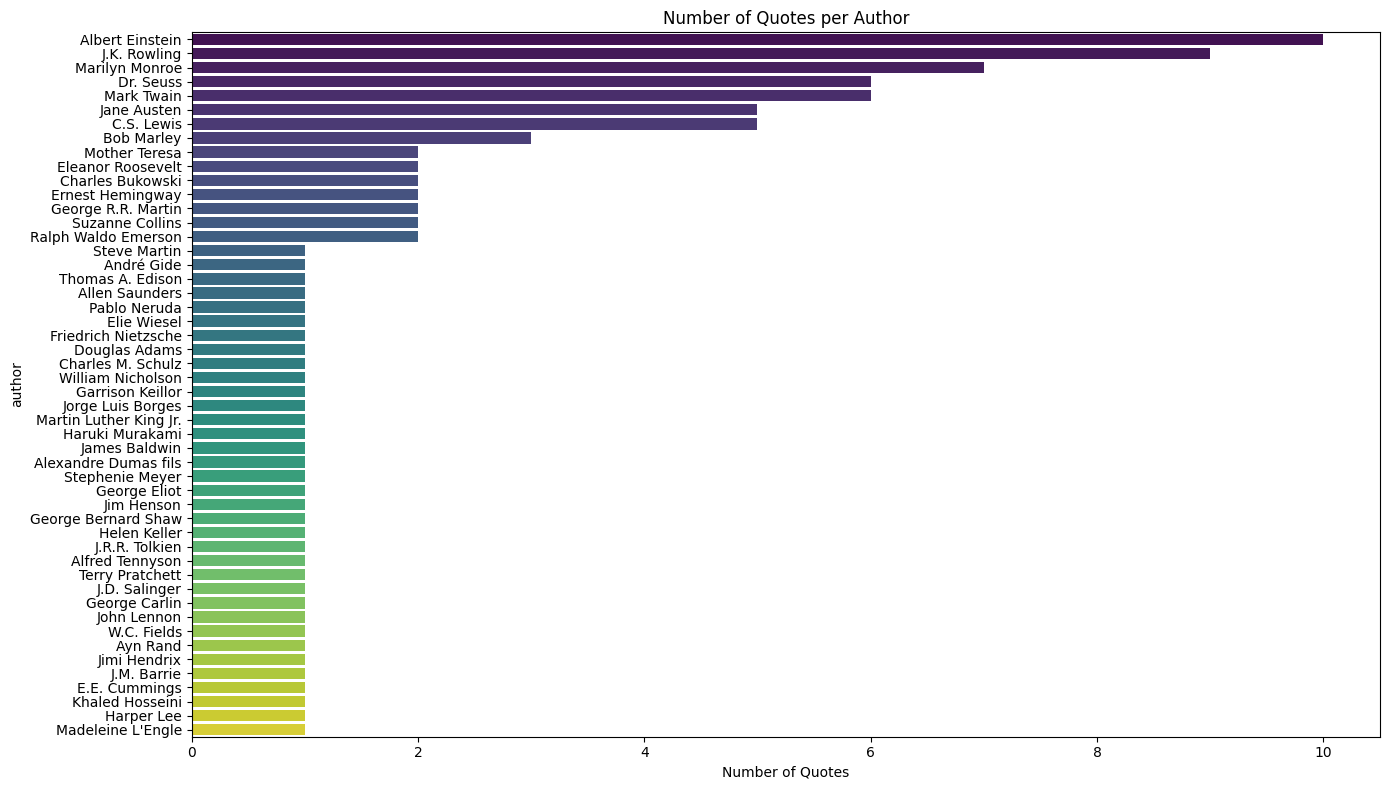

<ipython-input-39-da37eda82bda>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_sentiment.values, y=author_sentiment.index, palette="plasma")


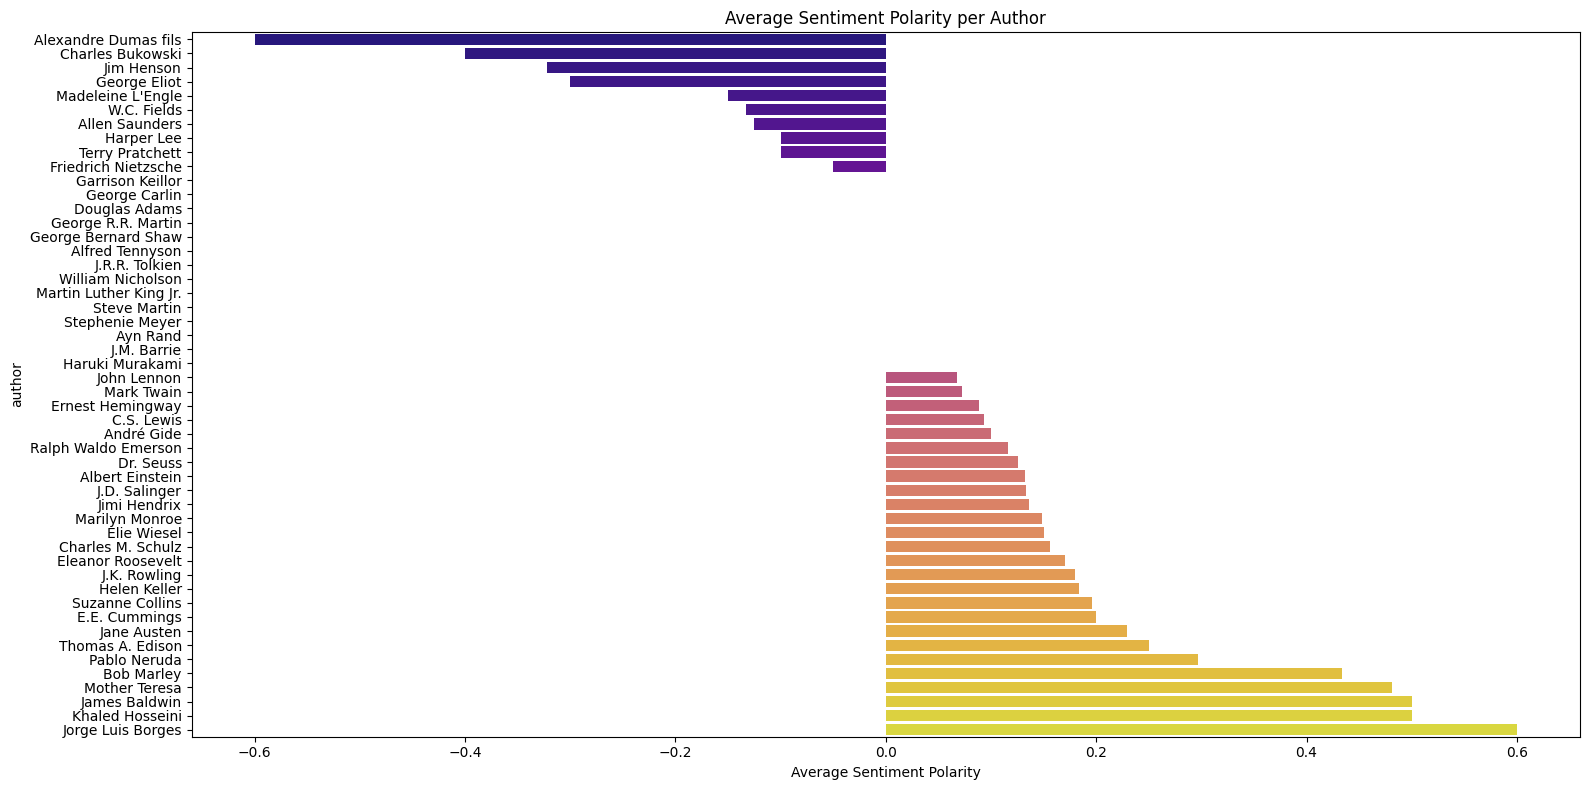

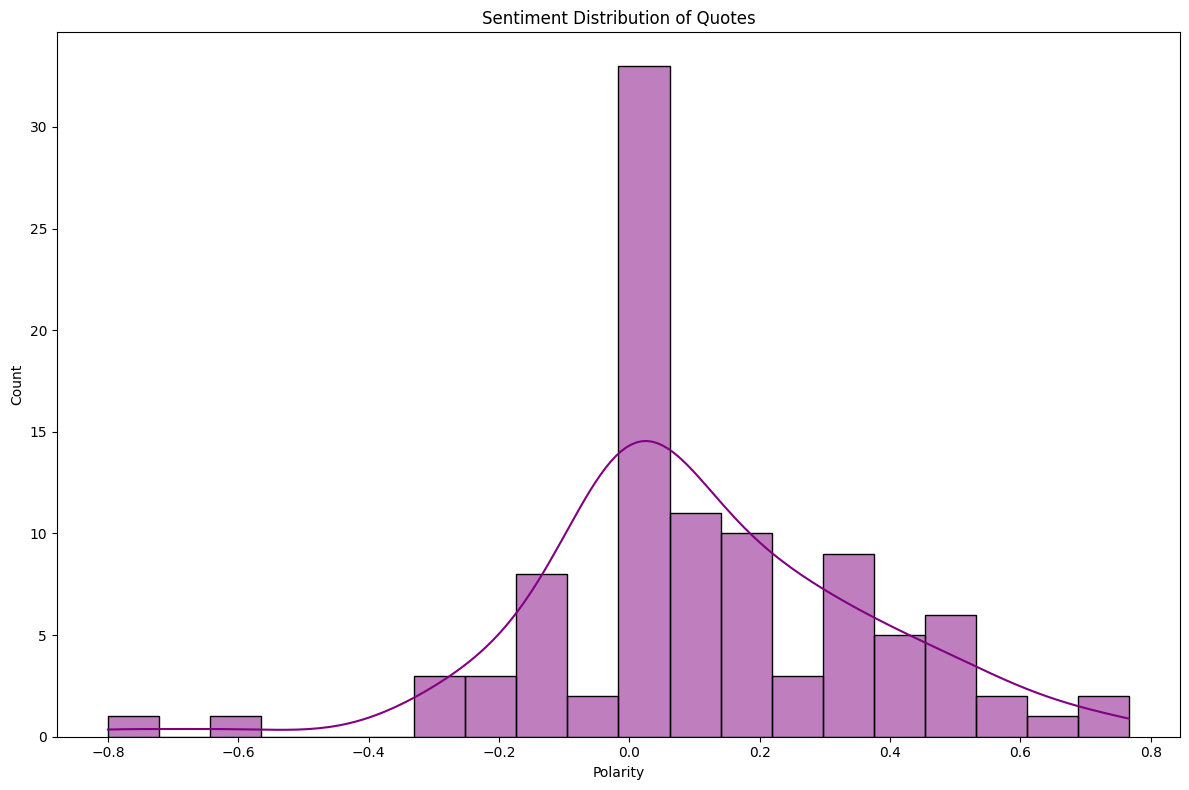

Interactive search...

🔎 Search Options:
1. Search by Author
2. Search by Keyword
3. Exit Search
Choose (1/2/3): 1
Enter author name: Albert Einstein

🔎 Found 10 matching quotes:

"“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”" - Albert Einstein
"“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”" - Albert Einstein
"“Try not to become a man of success. Rather become a man of value.”" - Albert Einstein
"“If you can't explain it to a six year old, you don't understand it yourself.”" - Albert Einstein
"“If you want your children to be intelligent, read them fairy tales. If you want them to be more intelligent, read them more fairy tales.”" - Albert Einstein
"“Logic will get you from A to Z; imagination will get you everywhere.”" - Albert Einstein
"“Any fool can know. The point is to understand.”" - Albert Einstein
"“Life is like riding a bi

In [ ]:
# Main function
def main():
    url = "https://quotes.toscrape.com"

    print("Scraping quotes...")
    quotes = scrape_quotes(url)

    print("Analyzing sentiment...")
    df = analyze_quotes(quotes)

    print("Generating visualizations...")
    df = analyze_quotes_to_visualize(quotes)
    visualize_data(df)

    print("Interactive search...")
    interactive_search(quotes)
    print("Save  data...")
    save_quotes(df, filename="data/quotes.csv") #Path should be changed

if __name__ == "__main__":
    main()